# Week 5: Normalizing Senior Population Data, Creating Charts

This week I will work on finalizing the basemaps for our midterm presentation. Additionally, I will attempt to create some charts for presentation.

# Part 1: Create a Normalized Map of Age 65+ Population by Block Group

Although we have a map of the density of seniors by block group, we want to normalize this data over the entire population so we can see what percentage of each block group is Seniors. 

In [9]:
#libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import fiona 
import numpy as np

## Importing age data
From here, we want a normalized age data table with percent seniors/ total population. 

In [24]:
df = pd.read_csv('age.csv')
df.head(5)
df.columns

Index(['Geo_FIPS', 'Geo_QName', 'Geo_FILEID', 'Geo_STUSAB', 'Geo_SUMLEV',
       'Geo_GEOCOMP', 'Geo_LOGRECNO', 'Geo_US', 'Geo_REGION', 'Geo_DIVISION',
       'Geo_STATECE', 'Geo_STATE', 'Geo_COUNTY', 'Geo_COUSUB', 'Geo_PLACE',
       'Geo_TRACT', 'Geo_BLKGRP', 'Geo_CONCIT', 'Geo_AIANHH', 'Geo_AIANHHFP',
       'Geo_AIHHTLI', 'Geo_AITSCE', 'Geo_AITS', 'Geo_ANRC', 'Geo_CBSA',
       'Geo_CSA', 'Geo_METDIV', 'Geo_MACC', 'Geo_MEMI', 'Geo_NECTA',
       'Geo_CNECTA', 'Geo_NECTADIV', 'Geo_UA', 'Geo_UACP', 'Geo_CDCURR',
       'Geo_SLDU', 'Geo_SLDL', 'Geo_VTD', 'Geo_ZCTA3', 'Geo_ZCTA5',
       'Geo_SUBMCD', 'Geo_SDELM', 'Geo_SDSEC', 'Geo_SDUNI', 'Geo_UR',
       'Geo_PCI', 'Geo_TAZ', 'Geo_UGA', 'Geo_PUMA5', 'Geo_PUMA1', 'Geo_GEOID',
       'Geo_NAME', 'Geo_BTTR', 'Geo_BTBG', 'Geo_PLACESE', 'SE_A01001_001',
       'SE_A01001_002', 'SE_A01001_003', 'SE_A01001_004', 'SE_A01001_005',
       'SE_A01001_006', 'SE_A01001_007', 'SE_A01001_008', 'SE_A01001_009',
       'SE_A01001_010', 'SE_A01001_011

The "Total Population" Column is 'SE_A01001_001' According to the [data dictionary](https://www.socialexplorer.com/data/ACS2021_5yr/metadata/?ds=SE)

# Fixing Geo_FIPS leading zero

This will allow us to join the data with the spatial block boundaries using a primary key. 

In [25]:
df.Geo_FIPS.head()

0    60014001001
1    60014001002
2    60014002001
3    60014002002
4    60014003001
Name: Geo_FIPS, dtype: int64

In [26]:
#specify geofips as a string

df = pd.read_csv('age.csv',
                 dtype = 
                 {
                     'Geo_FIPS':str,
                     'Geo_STATE':str, 
                     'Geo_COUNTY':str
                 }
                )

In [28]:
df.head(5)

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_A01001_004,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013
0,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",ACSSF,ca,150,0,11947,NaN,NaN,NaN,...,243,57,98,221,111,395,228,214,116,67
1,060014001002,"Block Group 2, Census Tract 4001, Alameda Coun...",ACSSF,ca,150,0,11948,NaN,NaN,NaN,...,29,19,14,121,186,139,311,226,95,83
2,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",ACSSF,ca,150,0,11949,NaN,NaN,NaN,...,52,32,31,115,125,117,123,232,70,17
3,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",ACSSF,ca,150,0,11950,NaN,NaN,NaN,...,38,22,30,310,155,111,91,62,82,11
4,060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",ACSSF,ca,150,0,11951,NaN,NaN,NaN,...,41,37,39,225,147,173,137,141,67,0


In [29]:
#confirming it changed to a string
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25607 entries, 0 to 25606
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       25607 non-null  object 
 1   Geo_QName      25607 non-null  object 
 2   Geo_FILEID     25607 non-null  object 
 3   Geo_STUSAB     25607 non-null  object 
 4   Geo_SUMLEV     25607 non-null  int64  
 5   Geo_GEOCOMP    25607 non-null  int64  
 6   Geo_LOGRECNO   25607 non-null  int64  
 7   Geo_US         0 non-null      float64
 8   Geo_REGION     0 non-null      float64
 9   Geo_DIVISION   0 non-null      float64
 10  Geo_STATECE    0 non-null      float64
 11  Geo_STATE      25607 non-null  object 
 12  Geo_COUNTY     25607 non-null  object 
 13  Geo_COUSUB     0 non-null      float64
 14  Geo_PLACE      0 non-null      float64
 15  Geo_TRACT      25607 non-null  int64  
 16  Geo_BLKGRP     25607 non-null  int64  
 17  Geo_CONCIT     0 non-null      float64
 18  Geo_AI

# Deleting Null Columns

In [30]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [36]:
df = df.dropna(axis=1,how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25607 entries, 0 to 25606
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Geo_FIPS          25607 non-null  object 
 1   Geo_QName         25607 non-null  object 
 2   Geo_FILEID        25607 non-null  object 
 3   Geo_STUSAB        25607 non-null  object 
 4   Geo_SUMLEV        25607 non-null  int64  
 5   Geo_GEOCOMP       25607 non-null  int64  
 6   Geo_LOGRECNO      25607 non-null  int64  
 7   Geo_STATE         25607 non-null  object 
 8   Geo_COUNTY        25607 non-null  object 
 9   Geo_TRACT         25607 non-null  int64  
 10  Geo_BLKGRP        25607 non-null  int64  
 11  Geo_GEOID         25607 non-null  object 
 12  Geo_NAME          25607 non-null  object 
 13  SE_A01001_001     25607 non-null  int64  
 14  SE_A01001_002     25607 non-null  int64  
 15  SE_A01001_003     25607 non-null  int64  
 16  SE_A01001_004     25607 non-null  int64 

25 non-null columns, most relate to age group

# Create a "Total Senior Populaton" Column
We want a column of "totals" that is a sum of columns ending in 011, 012, and 013, because these represent the age groups (65+) that we are concerned with.

In [37]:
df['Total Senior Pop']=df.iloc[:,[23,24,25]].sum(axis=1)

In [38]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,...,SE_A01001_005,SE_A01001_006,SE_A01001_007,SE_A01001_008,SE_A01001_009,SE_A01001_010,SE_A01001_011,SE_A01001_012,SE_A01001_013,Total Senior Pop
0,060014001001,"Block Group 1, Census Tract 4001, Alameda Coun...",ACSSF,ca,150,0,11947,06,001,400100,...,57,98,221,111,395,228,214,116,67,397
1,060014001002,"Block Group 2, Census Tract 4001, Alameda Coun...",ACSSF,ca,150,0,11948,06,001,400100,...,19,14,121,186,139,311,226,95,83,404
2,060014002001,"Block Group 1, Census Tract 4002, Alameda Coun...",ACSSF,ca,150,0,11949,06,001,400200,...,32,31,115,125,117,123,232,70,17,319
3,060014002002,"Block Group 2, Census Tract 4002, Alameda Coun...",ACSSF,ca,150,0,11950,06,001,400200,...,22,30,310,155,111,91,62,82,11,155
4,060014003001,"Block Group 1, Census Tract 4003, Alameda Coun...",ACSSF,ca,150,0,11951,06,001,400300,...,37,39,225,147,173,137,141,67,0,208


# Which columns to keep?
Look at data dictionary and figure out which columns to keep. 

link to data dictionary: https://www.socialexplorer.com/data/ACS2021_5yr/metadata/?ds=SE

Only keep FIPS, Total Population, and the age groups we are interested in (65+), as well as the Total Senior Population column that we created.  

In [39]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A01001_001',     
                   'SE_A01001_011',
                   'SE_A01001_012',
                   'SE_A01001_013',
                  'Total Senior Pop']
#save in a new dataframe
df2 = df[columns_to_keep]
df2.head()

,Geo_FIPS,SE_A01001_001,SE_A01001_011,SE_A01001_012,SE_A01001_013,Total Senior Pop
0,060014001001,1963,214,116,67,397
1,060014001002,1361,226,95,83,404
2,060014002001,1029,232,70,17,319
3,060014002002,1009,62,82,11,155
4,060014003001,1122,141,67,0,208


# Renaming Columns

In [95]:
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A01001_011',
 'SE_A01001_012',
 'SE_A01001_013',
 'Total Senior Pop']

In [42]:
#copy and paste list above, replace vals with desired names
df2.columns = ['FIPS',
               'Total Pop',
               'Age 65-74',
               'Age 75-84', 
               'Age 85+', 
               'Total Senior Pop']
df2.sample(5)

,FIPS,Total Pop,Age 65-74,Age 75-84,Age 85+,Total Senior Pop
17280,060710091094,2221,137,97,28,262
18499,060730101033,1935,128,33,33,194
24501,061010506041,1492,62,57,30,149
11674,060590017043,3070,203,65,71,339
10415,060379200351,2905,178,18,27,223


# Creating a "Percentage Seniors" Column

For mapping, we want our data to be normalized across the entire population, so that increased density of seniors doesn't just reflect density as a whole population. To do this, we want to find the "rate" of senior population, so we will use the formula pct seniors = 100(senior pop/total pop). 

In [44]:
df2['Pct Seniors'] = 100*(df2['Total Senior Pop']/df2['Total Pop'])
df2.sample(5)

/tmp/ipykernel_946/101868836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Pct Seniors'] = 100*(df2['Total Senior Pop']/df2['Total Pop'])


,FIPS,Total Pop,Age 65-74,Age 75-84,Age 85+,Total Senior Pop,Pct Seniors
3895,060330001001,2036,38,132,84,254,12.475442
20531,060770031153,1348,9,0,26,35,2.596439
24826,061070035043,2293,132,188,20,340,14.827737
23457,060952513002,1209,145,69,8,222,18.362283
17305,060710091291,3063,142,43,55,240,7.835455


# Clipping

In [45]:
import geopandas as gpd

We want to clip the County boundaries down to just the City of LA. First, read a dataset of all the municipalities within LA county. 

In [48]:
cities=gpd.read_file('City_Boundaries.geojson')
cities.head(5)

,OBJECTID,CITY_NAME,CITY_LABEL,ABBR,OF_AREA_SM,CITY_TYPE,FEAT_TYPE,COLOR_EGIS,URL,PHONE,last_edited_date,ShapeSTArea,ShapeSTLength,geometry
0,3,Redondo Beach,Redondo Beach,RBCH,6.349,City,Breakwater,"Pink - RGB 255,190,232",www.redondo.org,3103721171,2022-07-20 00:08:28+00:00,2.483437e+05,7484.640344,"POLYGON ((-118.39951 33.84377, -118.39952 33.8..."
1,4,Long Beach,Long Beach,LB,50.309,City,Water,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-20 00:08:28+00:00,4.000260e+06,20369.924519,"POLYGON ((-118.21061 33.72181, -118.21064 33.7..."
2,5,Redondo Beach,Redondo Beach,RBCH,6.349,City,Breakwater,"Pink - RGB 255,190,232",www.redondo.org,3103721171,2022-07-20 00:08:28+00:00,9.452611e+03,701.117043,"POLYGON ((-118.39150 33.83193, -118.39160 33.8..."
3,6,Los Angeles,Los Angeles,LA,468.852,City,Breakwater,"Gray - RGB 178,178,178",www.lacity.org,2134733231,2022-07-20 00:08:28+00:00,2.857692e+05,17391.983014,"POLYGON ((-118.26566 33.70405, -118.26574 33.7..."
4,7,Long Beach,Long Beach,LB,50.309,City,Breakwater,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-20 00:08:28+00:00,1.097324e+05,5448.776853,"POLYGON ((-118.11850 33.74278, -118.11855 33.7..."


Query to subset just the City of LA. 

In [49]:
lacity=cities.query("CITY_NAME == 'Los Angeles'").copy()

Eventually, we want to join our census data to block groups within the City of LA. First, let's clip the block groups down to the City level, then we can join it to the census data. 

In [51]:
#finding a geojson file for census blocks 
blocks = gpd.read_file('Census_Block_Groups_2020.geojson')
blocks.head()

,OBJECTID,BG20,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,1011101,101110,BG 1,4.814335e+06,8706.027651,"POLYGON ((-118.28497 34.25678, -118.28497 34.2..."
1,2,1011102,101110,BG 2,3.814445e+06,8807.809581,"POLYGON ((-118.29265 34.25957, -118.29319 34.2..."
2,3,1011103,101110,BG 3,3.666841e+06,8335.114480,"POLYGON ((-118.29134 34.25956, -118.29134 34.2..."
3,4,1011221,101122,BG 1,1.711345e+07,19507.471377,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
4,5,1011222,101122,BG 2,1.134430e+07,19207.990424,"POLYGON ((-118.28528 34.26644, -118.28541 34.2..."


Clip the county down to the city boundary

In [55]:
blocks_clip = gpd.clip(blocks, lacity)
blocks_clip.head(5)

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


,OBJECTID,BG20,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
2456,2457,2742023,274202,BG 3,1.045276e+06,4082.112116,"POLYGON ((-118.46464 33.97641, -118.46508 33.9..."
2449,2450,2739025,273902,BG 5,5.131686e+06,9166.983856,"MULTIPOLYGON (((-118.47291 33.98356, -118.4713..."
2448,2449,2739024,273902,BG 4,1.861628e+06,6284.133027,"POLYGON ((-118.46565 33.97974, -118.46587 33.9..."
2447,2448,2739023,273902,BG 3,1.218168e+06,4851.582209,"POLYGON ((-118.46315 33.98615, -118.46310 33.9..."
2435,2436,2735023,273502,BG 3,4.868382e+06,10124.770714,"POLYGON ((-118.47672 33.98746, -118.47506 33.9..."


Now, the block are only shown at the city level, not across the whole county. Let's continue to clean up the df. 

In [62]:
#subset only the columns we need (fips, area, and geometry)
blocks_clip = blocks_clip [['BG20', 'ShapeSTArea', 'geometry']]
blocks_clip.head()

,BG20,ShapeSTArea,geometry
2456,2742023,1.045276e+06,"POLYGON ((-118.46464 33.97641, -118.46508 33.9..."
2449,2739025,5.131686e+06,"MULTIPOLYGON (((-118.47291 33.98356, -118.4713..."
2448,2739024,1.861628e+06,"POLYGON ((-118.46565 33.97974, -118.46587 33.9..."
2447,2739023,1.218168e+06,"POLYGON ((-118.46315 33.98615, -118.46310 33.9..."
2435,2735023,4.868382e+06,"POLYGON ((-118.47672 33.98746, -118.47506 33.9..."


Now we want to join the census block boundaries within the city of LA to our census data. We have to create a FIPS column for the block boundaries, since they only show the block group number in "BG20". 

In [67]:
# create a FIPS column
blocks_clip['FIPS'] ='06' + '037' + blocks_clip['BG20']

In [68]:
blocks_clip.head()
#ignore error!

,BG20,ShapeSTArea,geometry,FIPS
2456,2742023,1.045276e+06,"POLYGON ((-118.46464 33.97641, -118.46508 33.9...",060372742023
2449,2739025,5.131686e+06,"MULTIPOLYGON (((-118.47291 33.98356, -118.4713...",060372739025
2448,2739024,1.861628e+06,"POLYGON ((-118.46565 33.97974, -118.46587 33.9...",060372739024
2447,2739023,1.218168e+06,"POLYGON ((-118.46315 33.98615, -118.46310 33.9...",060372739023
2435,2735023,4.868382e+06,"POLYGON ((-118.47672 33.98746, -118.47506 33.9...",060372735023


The FIPS code worked, now we have a primary key to merge our Census data. Once it is merged, it will have the boundary geometry attached and will be mappable. 

In [71]:
#join the ACS data with the geographic boundaries
blocks_age = blocks_clip.merge(df2,on="FIPS")

In [72]:
blocks_age.head(5)

,BG20,ShapeSTArea,geometry,FIPS,Total Pop,Age 65-74,Age 75-84,Age 85+,Total Senior Pop,Pct Seniors
0,2742023,1.045276e+06,"POLYGON ((-118.46464 33.97641, -118.46508 33.9...",060372742023,740,0,0,13,13,1.756757
1,2739025,5.131686e+06,"MULTIPOLYGON (((-118.47291 33.98356, -118.4713...",060372739025,763,120,38,0,158,20.707733
2,2739024,1.861628e+06,"POLYGON ((-118.46565 33.97974, -118.46587 33.9...",060372739024,998,90,10,0,100,10.020040
3,2739023,1.218168e+06,"POLYGON ((-118.46315 33.98615, -118.46310 33.9...",060372739023,1098,92,137,11,240,21.857923
4,2735023,4.868382e+06,"POLYGON ((-118.47672 33.98746, -118.47506 33.9...",060372735023,923,29,40,0,69,7.475623


Now we have a mappable df of the total senior pop and percent population. 

## Creating columns for Area of Block Group and Population Density

In addition to percent of seniors, we want to see how many seniors per square mile are in each block group. To do that, we have to figure out the square mile area of each block group. 
The column ShapeSTArea shows the area of each block group shape, but it is in units of square meters. To change this to square miles, we will divide each by [2,590,000](https://www.google.com/search?q=square+meters+to+square+miles&rlz=1C1CHBF_enUS878US878&oq=square&aqs=chrome.0.69i59j69i57j0i131i433i512j0i433i512j0i131i433i512l2j69i60l2.994j0j7&sourceid=chrome&ie=UTF-8)

In [82]:
blocks_age['Square Miles'] = blocks_age['ShapeSTArea']/2590000
blocks_age.head(5)

,BG20,ShapeSTArea,geometry,FIPS,Total Pop,Age 65-74,Age 75-84,Age 85+,Total Senior Pop,Pct Seniors,Square Miles,Pop Density
0,2742023,1.045276e+06,"POLYGON ((-118.46464 33.97641, -118.46508 33.9...",060372742023,740,0,0,13,13,1.756757,0.403581,32.0
1,2739025,5.131686e+06,"MULTIPOLYGON (((-118.47291 33.98356, -118.4713...",060372739025,763,120,38,0,158,20.707733,1.981346,80.0
2,2739024,1.861628e+06,"POLYGON ((-118.46565 33.97974, -118.46587 33.9...",060372739024,998,90,10,0,100,10.020040,0.718775,139.0
3,2739023,1.218168e+06,"POLYGON ((-118.46315 33.98615, -118.46310 33.9...",060372739023,1098,92,137,11,240,21.857923,0.470335,510.0
4,2735023,4.868382e+06,"POLYGON ((-118.47672 33.98746, -118.47506 33.9...",060372735023,923,29,40,0,69,7.475623,1.879684,37.0


Now, for population density: Divide the total senior pop by the square mile of the block

In [83]:
blocks_age['Pop Density'] = round(blocks_age['Total Senior Pop']/blocks_age['Square Miles']) #rounding so we get whole numbers
blocks_age.head(5)

,BG20,ShapeSTArea,geometry,FIPS,Total Pop,Age 65-74,Age 75-84,Age 85+,Total Senior Pop,Pct Seniors,Square Miles,Pop Density
0,2742023,1.045276e+06,"POLYGON ((-118.46464 33.97641, -118.46508 33.9...",060372742023,740,0,0,13,13,1.756757,0.403581,32.0
1,2739025,5.131686e+06,"MULTIPOLYGON (((-118.47291 33.98356, -118.4713...",060372739025,763,120,38,0,158,20.707733,1.981346,80.0
2,2739024,1.861628e+06,"POLYGON ((-118.46565 33.97974, -118.46587 33.9...",060372739024,998,90,10,0,100,10.020040,0.718775,139.0
3,2739023,1.218168e+06,"POLYGON ((-118.46315 33.98615, -118.46310 33.9...",060372739023,1098,92,137,11,240,21.857923,0.470335,510.0
4,2735023,4.868382e+06,"POLYGON ((-118.47672 33.98746, -118.47506 33.9...",060372735023,923,29,40,0,69,7.475623,1.879684,37.0


Now we have a df that shows percent of seniors in each block group and number of seniors per square mile in each block group. Let's see how the two compare on maps. 

# Mapping

First, map the percentage of seniors over the total population. 

<AxesSubplot: >

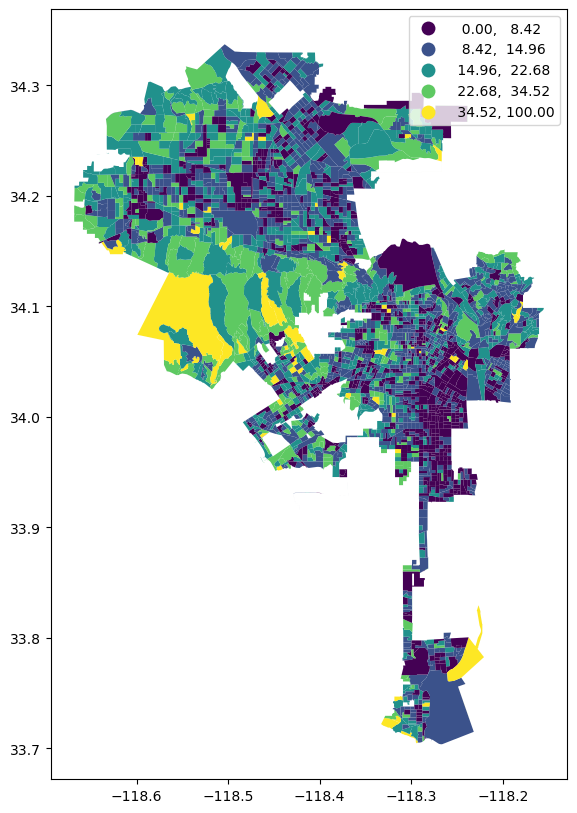

In [91]:
blocks_age.plot(figsize=(12,10),
                column='Pct Seniors',
                legend=True,
                scheme='NaturalBreaks')

This pattern shows that seniors might be more densly populated in the hills, a less dense area design-wise. Zooming in could be helpful.

Now, compare this to the population density of seniors. 

<AxesSubplot: >

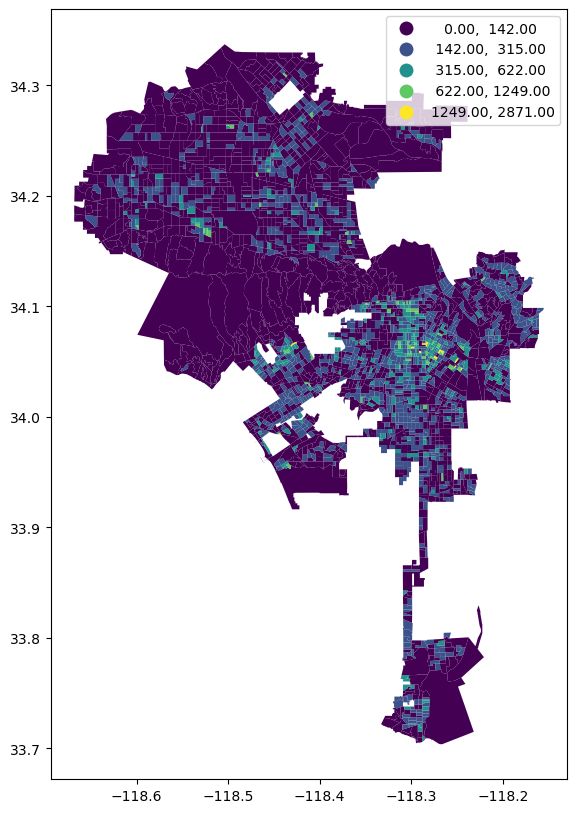

In [87]:
blocks_age.plot(figsize=(12,10),
                column='Pop Density',
                legend=True,
                scheme='NaturalBreaks')

It is likely that the patterns here just reflect the overall population density per square mile, as smaller area block groups may have higher populations downtown. We should propbably use the "percent seniors" map to better express the different densities of seniors. 

In [92]:
blocks_age.to_csv('Percent_Senior_Basemap.csv')